<a href="https://colab.research.google.com/github/sametgumus212/uncertainty/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
d=3.2
t=0.6
m=45.4
V=np.pi*(d/2)**2*t
rho=m/V
print("Yoğunluk = {0:5.2f} g/cm^3".format(rho))


Yoğunluk =  9.41 g/cm^3


(5.0, 20.0)

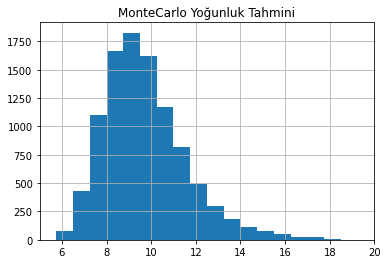

In [ ]:
sigma_d=0.1
sigma_t=0.1
sigma_m=0.1
N=10000
dMC=d+sigma_d*np.random.normal(size=N)
tMC=t+sigma_t*np.random.normal(size=N)
mMC=m+sigma_m*np.random.normal(size=N)

VMC=np.pi*(dMC/2)**2*tMC
rhoMC=mMC/VMC

plt.hist(rhoMC,bins=np.linspace(5,20,21))
plt.grid()
plt.title("MonteCarlo Yoğunluk Tahmini")
plt.xlim(5,20)

In [ ]:
print("Rho tahmini: {0:5.3f}  +/-  {1:5.3f} g/cm^3" .format(rhoMC.mean(),2*rhoMC.std()))

Rho tahmini: 9.737  +/-  3.797 g/cm^3


In [ ]:
import random

In [ ]:
class FairRoulette():
  
  def __init__(self):
    self.pockets=[]
    for i in range(1,37):
      self.pockets.append(i)
    self.ball=None
    self.pocketOdds=len(self.pockets)-1
  def spin(self):
    self.ball=random.choice(self.pockets)
  def betPocket(self,pocket,amt):
    if str(pocket)==str(self.ball):
      return amt*self.pocketOdds
    else: return -amt
  def __str__(self):
    return 'Fair Roulette'

In [ ]:
class EuRoulette(FairRoulette):
  def __init__(self):
    FairRoulette.__init__(self)
    self.pockets.append('0')
  def __str__(self):
    return 'European Roulette'

In [ ]:
def playRoulette(game,numSpins,pocket,bet,toPrint):
  totPocket=0
  for i in range(numSpins):
    
    game.spin()
    totPocket +=game.betPocket(pocket,bet)
  if toPrint:
    print(numSpins,'spins of', game)
    print('Expected return betting', pocket, '=',str(100*totPocket/numSpins)+ '%\n')
  return (totPocket/numSpins)



In [ ]:
random.seed(0)
game=FairRoulette()
for numSpins in(100,1000000):
  for i in range(2):
    playRoulette(game,numSpins,2,1,True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.0424%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.5876%



In [ ]:
random.seed(0)
game=EuRoulette()
for numSpins in(100,1000000):
  for i in range(3):
    playRoulette(game,numSpins,2,1,True)

100 spins of European Roulette
Expected return betting 2 = -32.0%

100 spins of European Roulette
Expected return betting 2 = -52.0%

100 spins of European Roulette
Expected return betting 2 = -36.0%

1000000 spins of European Roulette
Expected return betting 2 = -33.3242%

1000000 spins of European Roulette
Expected return betting 2 = -33.3864%

1000000 spins of European Roulette
Expected return betting 2 = -33.4354%

